<a href="https://colab.research.google.com/github/Souvik45/Movie_Rating_Prediction/blob/main/JobRole_Salary_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***`Job Role and Salary Predictor`***

---


**Importing Necessary Libaries**

---



In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings("ignore")

import pickle
import joblib

**1.Load the Dataset**

---




In [3]:
df=pd.read_csv("/content/glassdoor_jobs.csv")

**2.Data Prepocessing**

---



In [4]:
print("Column names: ")
print(df.columns)

Column names: 
Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')


In [5]:
print("First 5 rows of the dataset: ")
df.head(5)

First 5 rows of the dataset: 


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [6]:
print("Shape of dataset:", df.shape)

Shape of dataset: (956, 15)


In [7]:
print("\n--- Missing Values ---")
print(df.isnull().sum())
print("\nTotal Missing Values:", df.isnull().sum().sum())


--- Missing Values ---
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

Total Missing Values: 0


In [8]:
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates}")

Total duplicate rows: 0


In [9]:
print("\n--- Data Types ---")
print(df.dtypes)


--- Data Types ---
Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object


In [10]:
print("\n--- Number of Unique Values in Each Column ---")
print(df.nunique())


--- Number of Unique Values in Each Column ---
Unnamed: 0           956
Job Title            328
Salary Estimate      417
Job Description      596
Rating                32
Company Name         448
Location             237
Headquarters         235
Size                   9
Founded              109
Type of ownership     13
Industry              63
Sector                25
Revenue               14
Competitors          149
dtype: int64


In [11]:
print("\n--- Descriptive Statistics (Numerical Columns) ---")
display(df.describe())


--- Descriptive Statistics (Numerical Columns) ---


,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [12]:
print("\n--- Descriptive Statistics (All Columns) ---")
display(df.describe(include='all'))


--- Descriptive Statistics (All Columns) ---


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
count,956.000000,956,956,956,956.000000,956,956,956,956,956.000000,956,956,956,956,956
unique,NaN,328,417,596,NaN,448,237,235,9,NaN,13,63,25,14,149
top,NaN,Data Scientist,-1,Data Engineer with R\n\n-Contract Role in Atla...,NaN,Takeda Pharmaceuticals\n3.7,"New York, NY","New York, NY",1001 to 5000 employees,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1
freq,NaN,178,214,4,NaN,14,78,75,177,NaN,532,148,239,299,634
mean,477.500000,NaN,NaN,NaN,3.601255,NaN,NaN,NaN,NaN,1774.605649,NaN,NaN,NaN,NaN,NaN
std,276.117729,NaN,NaN,NaN,1.067619,NaN,NaN,NaN,NaN,598.942517,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN
25%,238.750000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1937.000000,NaN,NaN,NaN,NaN,NaN
50%,477.500000,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,1992.000000,NaN,NaN,NaN,NaN,NaN
75%,716.250000,NaN,NaN,NaN,4.200000,NaN,NaN,NaN,NaN,2008.000000,NaN,NaN,NaN,NaN,NaN


In [13]:
print("\n--- Categories in Categorical Columns ---")
for col in df.select_dtypes(include=['object']).columns:
    unique_vals = df[col].unique()
    print(f"\nColumn: {col}")
    print(f"Unique categories ({len(unique_vals)}):")
    print(unique_vals[:10])


--- Categories in Categorical Columns ---

Column: Job Title
Unique categories (328):
['Data Scientist' 'Healthcare Data Scientist' 'Research Scientist'
 'Staff Data Scientist - Technology' 'Data Analyst' 'Data Engineer I'
 'Scientist I/II, Biology' 'Customer Data Scientist'
 'Data Scientist - Health Data Analytics'
 'Senior Data Scientist / Machine Learning']

Column: Salary Estimate
Unique categories (417):
['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)' '$71K-$119K (Glassdoor est.)'
 '$54K-$93K (Glassdoor est.)' '$86K-$142K (Glassdoor est.)'
 '$38K-$84K (Glassdoor est.)' '$120K-$160K (Glassdoor est.)']

Column: Job Description
Unique categories (596):
['Data Scientist\nLocation: Albuquerque, NM\nEducation Required: Bachelor’s degree required, preferably in math, engineering, business, or the sciences.\nSkills Required:\nBachelor’s Degree in relevant field, e.g., math, data analysis

**3.Data Cleaning**

In [14]:
#Renaming the columns of dataset
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Renamed columns:")
print(df.columns)

Renamed columns:
Index(['unnamed:_0', 'job_title', 'salary_estimate', 'job_description',
       'rating', 'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors'],
      dtype='object')


In [15]:
df.head()

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [16]:
#Removig rows with No salaries
df = df[df['salary_estimate'].notna()]

In [17]:
#Removing Extra Text from the data
df['salary_estimate'] = df['salary_estimate'].str.replace(r'\(.*\)', '', regex=True)

In [18]:
#Identify hourly or employer provided
df['hourly'] = df['salary_estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['salary_estimate'].apply(lambda x: 1 if 'employer provided salary' in x.lower() else 0)

In [19]:
#Cleaning the symbols and texts
df['salary_estimate'] = df['salary_estimate'].str.replace(r'\$|K|₹', '', regex=True)
df['salary_estimate'] = df['salary_estimate'].str.replace('per hour', '', case=False, regex=False)
df['salary_estimate'] = df['salary_estimate'].str.replace('employer provided salary:', '', case=False, regex=False)
df['salary_estimate'] = df['salary_estimate'].str.strip()

In [20]:
#Keeping rows that have a salary range (with '-')
df = df[df['salary_estimate'].str.contains('-', regex=False)]

In [21]:
#Split salary range into min and max
df[['min_salary', 'max_salary']] = df['salary_estimate'].str.split('-', expand=True)

In [22]:
#Clean numeric parts
df['min_salary'] = df['min_salary'].astype(str).str.extract(r'(\d+)').astype(float)
df['max_salary'] = df['max_salary'].astype(str).str.extract(r'(\d+)').astype(float)

In [23]:
#Compute average salary
df['salary_estimate'] = (df['min_salary'] + df['max_salary']) / 2

In [24]:
#Reseting the index
df.reset_index(drop=True, inplace=True)

In [25]:
df.head(5)

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0


In [26]:
df.drop(['min_salary','max_salary','unnamed:_0'] , axis =1)

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,hourly,employer_provided
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,Senior Data Engineer,102.5,THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0
952,"Project Scientist - Auton Lab, Robotics Institute",73.5,The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0
953,Data Science Manager,127.5,Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0
954,Data Engineer,NaN,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom,0,0


In [27]:
df['company_name'] = df.apply(lambda x: x['company_name'] if x['rating']<0 else x['company_name'][:-1], axis = 1)

In [28]:
df['company_name']= df['company_name'].apply(lambda x: x.split('\n')[0])

In [29]:
# Ensure the column exists
if 'location' in df.columns:
    # Convert to string to avoid attribute errors
    df['location'] = df['location'].astype(str)

    # Extract the state (text after the comma)
    df['job_state'] = df['location'].apply(lambda x: x.split(',')[-1].strip() if ',' in x else x.strip())
else:
    print("Column 'location' not found — check column names.")

In [30]:
df[['location', 'job_state']].head()

,location,job_state
0,"Albuquerque, NM",NM
1,"Linthicum, MD",MD
2,"Clearwater, FL",FL
3,"Richland, WA",WA
4,"New York, NY",NY


In [31]:
df['Same State'] = df.apply(lambda x: 1 if x.location==x.headquarters else 0, axis =1)
df.head()

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,...,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,job_state,Same State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,FL,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,WA,1
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,NY,1


In [32]:
#Check if headquarter and location is same or not
df['Same State'] = df.apply(lambda x: 1 if x.location==x.headquarters else 0, axis =1)
df.head()

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,...,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,job_state,Same State
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,NM,0
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,MD,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,FL,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,WA,1
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,NY,1


In [33]:
#Company Age
df['Age'] = df['founded'].apply(lambda x: x if x<1 else 2023-x)
df.head()

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,...,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,job_state,Same State,Age
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,NM,0,50
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,MD,0,39
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,FL,1,13
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,WA,1,58
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,NY,1,25


In [34]:
# Parsing Job Description (for skills like python, etc.)
df['python_yn'] = df['job_description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['r_yn'] = df['job_description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-' in x.lower() else 0)
df['spark'] = df['job_description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['aws'] = df['job_description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['excel'] = df['job_description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# Display the first few rows with the new columns
display(df[['job_description', 'python_yn', 'r_yn', 'spark', 'aws', 'excel']].head())

,job_description,python_yn,r_yn,spark,aws,excel
0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",1,0,0,0,1
1,What You Will Do:\n\nI. General Summary\n\nThe...,1,0,0,0,0
2,"KnowBe4, Inc. is a high growth information sec...",1,0,1,0,1
3,*Organization and Job ID**\nJob ID: 310709\n\n...,1,1,0,0,0
4,Data Scientist\nAffinity Solutions / Marketing...,1,1,0,0,1


In [35]:
df.head()

,unnamed:_0,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,...,min_salary,max_salary,job_state,Same State,Age,python_yn,r_yn,spark,aws,excel
0,0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,53.0,91.0,NM,0,50,1,0,0,0,1
1,1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,63.0,112.0,MD,0,39,1,0,0,0,0
2,2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,80.0,90.0,FL,1,13,1,0,1,0,1
3,3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,56.0,97.0,WA,1,58,1,1,0,0,0
4,4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,...,86.0,143.0,NY,1,25,1,1,0,0,1


In [36]:
df.columns

Index(['unnamed:_0', 'job_title', 'salary_estimate', 'job_description',
       'rating', 'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [37]:
# columns = df.columns
list = ['job_title', 'salary_estimate', 'job_description',
       'rating', 'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws',
       'excel']
# CleanedData= pd.DataFrame()
df=df[list].copy()

In [38]:
pd.set_option('display.max_columns', None)
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,job_state,Same State,Age,python_yn,r_yn,spark,aws,excel
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,NM,0,50,1,0,0,0,1
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,MD,0,39,1,0,0,0,0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,FL,1,13,1,0,1,0,1
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,WA,1,58,1,1,0,0,0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,NY,1,25,1,1,0,0,1


In [39]:
# Define the title_simplifier function
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

df['Job_simp'] = df['job_title'].apply(title_simplifier)

In [40]:
df.Job_simp.value_counts()

,count
Job_simp,
data scientist,358
na,238
data engineer,158
analyst,124
manager,36
mle,26
director,16


In [41]:
# Define the seniority function
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

df.loc[:, 'seniority'] = df['job_title'].apply(seniority)
df.seniority.value_counts()

,count
seniority,
na,744
senior,209
junior,3


In [42]:
df.loc[:, 'job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

,count
job_state,
CA,211
MA,124
NY,96
VA,56
IL,48
PA,41
TX,39
MD,37
WA,25


In [43]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority'],
      dtype='object')

In [44]:
df.loc[:, 'desc_len'] = df['job_description'].apply(lambda x: len(x))
df.desc_len

,desc_len
0,2536
1,4783
2,3461
3,3883
4,2728
...,...
951,6130
952,3078
953,1642
954,3036


In [45]:
df.loc[:, 'Num_comp'] = df['competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df[['competitors','Num_comp']]

,competitors,Num_comp
0,-1,0
1,-1,0
2,-1,0
3,"Oak Ridge National Laboratory, National Renewa...",3
4,"Commerce Signals, Cardlytics, Yodlee",3
...,...,...
951,"See Tickets, TicketWeb, Vendini",3
952,-1,0
953,-1,0
954,Slalom,1


In [46]:
# Hourly wage to annual
df.loc[:, 'min_salary_annual'] = df.apply(lambda x: x['min_salary']*2 if x['hourly']==1 else x['min_salary'], axis =1)
# Hourly wage to annual
df.loc[:, 'max_salary_annual'] = df.apply(lambda x: x['max_salary']*2 if x['hourly']==1 else x['max_salary'], axis =1)

In [47]:
display(df[df['hourly'] == 1][['hourly','min_salary_annual','max_salary_annual']])

,hourly,min_salary_annual,max_salary_annual
197,1,34.0,48.0
209,1,42.0,68.0
240,1,36.0,50.0
247,1,42.0,68.0
257,1,30.0,50.0
307,1,34.0,48.0
337,1,42.0,68.0
427,1,36.0,50.0
437,1,48.0,78.0
456,1,42.0,68.0


In [48]:
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,hourly,employer_provided,min_salary,max_salary,job_state,Same State,Age,python_yn,r_yn,spark,aws,excel,Job_simp,seniority,desc_len,Num_comp,min_salary_annual,max_salary_annual
0,Data Scientist,72.0,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53.0,91.0,NM,0,50,1,0,0,0,1,data scientist,na,2536,0,53.0,91.0
1,Healthcare Data Scientist,87.5,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63.0,112.0,MD,0,39,1,0,0,0,0,data scientist,na,4783,0,63.0,112.0
2,Data Scientist,85.0,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80.0,90.0,FL,1,13,1,0,1,0,1,data scientist,na,3461,0,80.0,90.0
3,Data Scientist,76.5,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56.0,97.0,WA,1,58,1,1,0,0,0,data scientist,na,3883,3,56.0,97.0
4,Data Scientist,114.5,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86.0,143.0,NY,1,25,1,1,0,0,1,data scientist,na,2728,3,86.0,143.0


**4.Exploratory Data Analysis**

---



In [49]:
df.describe()

,salary_estimate,rating,founded,hourly,employer_provided,min_salary,max_salary,Same State,Age,python_yn,r_yn,spark,aws,excel,desc_len,Num_comp,min_salary_annual,max_salary_annual
count,742.000000,956.000000,956.000000,956.000000,956.000000,742.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,742.000000,956.000000
mean,100.626011,3.601255,1774.605649,0.025105,0.017782,74.068733,98.937238,0.514644,42.928870,0.518828,0.208159,0.223849,0.253138,0.508368,3762.421548,0.921548,74.719677,99.687238
std,38.855948,1.067619,598.942517,0.156525,0.132229,31.869282,66.907440,0.500047,50.594178,0.499907,0.406204,0.417040,0.435037,0.500192,1554.687880,1.333859,30.980593,66.320935
min,13.500000,-1.000000,-1.000000,0.000000,0.000000,10.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,15.000000,1.000000
25%,73.500000,3.300000,1937.000000,0.000000,0.000000,52.000000,45.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2687.500000,0.000000,52.000000,58.750000
50%,97.500000,3.800000,1992.000000,0.000000,0.000000,69.500000,110.000000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3620.000000,0.000000,69.500000,110.000000
75%,122.500000,4.200000,2008.000000,0.000000,0.000000,91.000000,143.000000,1.000000,55.000000,1.000000,0.000000,0.000000,1.000000,1.000000,4637.000000,3.000000,91.000000,143.000000
max,254.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,202.000000,306.000000


In [50]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority', 'desc_len', 'Num_comp', 'min_salary_annual',
       'max_salary_annual'],
      dtype='object')

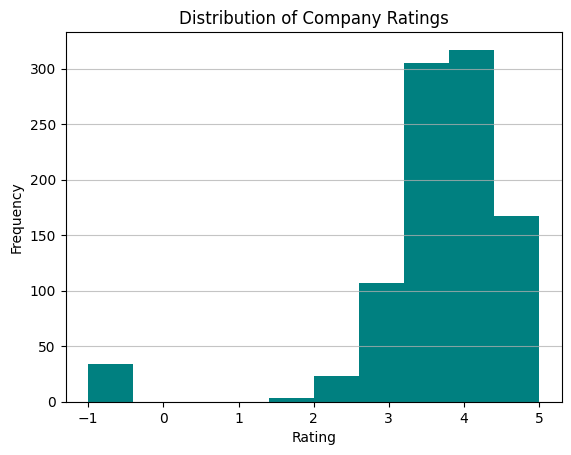

In [51]:
plt.hist(df.rating, color='teal')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Company Ratings")
plt.grid(axis='y', alpha=0.75)
plt.show()

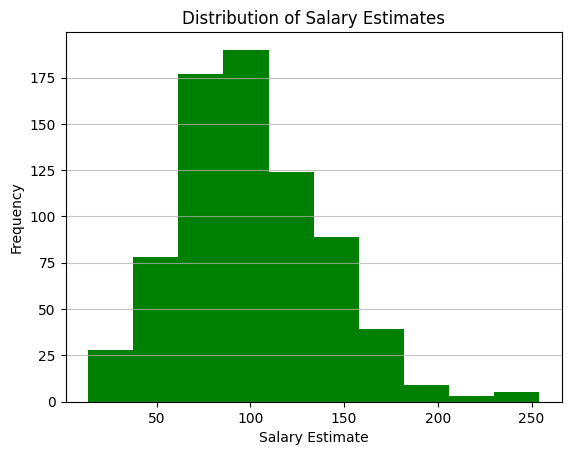

In [52]:
plt.hist(df.salary_estimate,color='green')
plt.xlabel("Salary Estimate")
plt.ylabel("Frequency")
plt.title("Distribution of Salary Estimates")
plt.grid(axis='y', alpha=0.75)
plt.show()

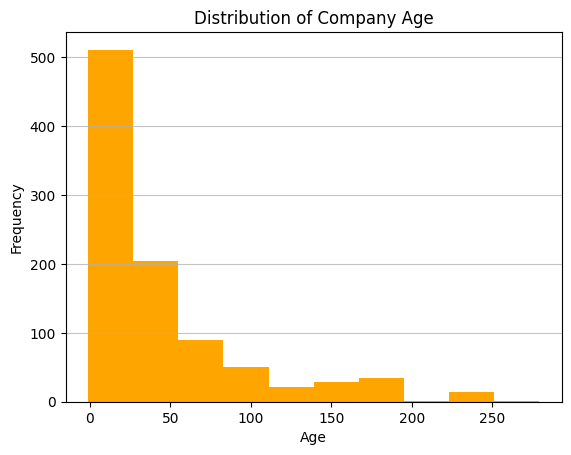

In [53]:
plt.hist(df.Age,color='orange')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Company Age")
plt.grid(axis='y', alpha=0.75)
plt.show()

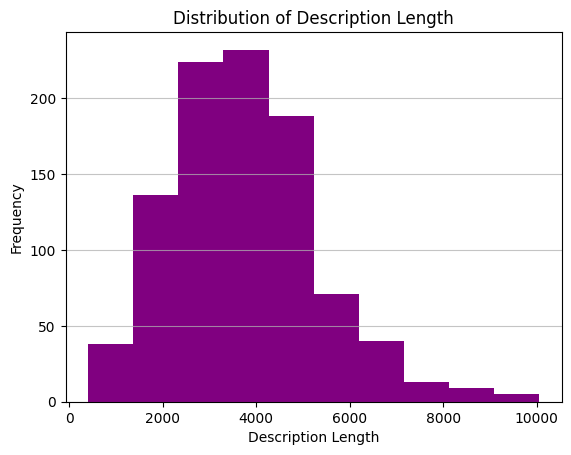

In [54]:
plt.hist(df.desc_len,color='purple')
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.title("Distribution of Description Length")
plt.grid(axis='y', alpha=0.75)
plt.show()

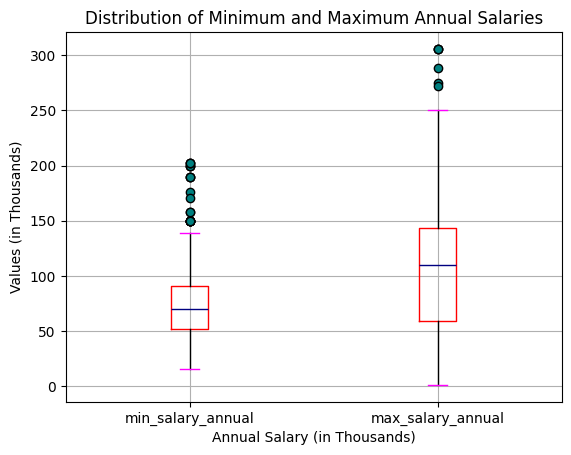

In [55]:
ax = df.boxplot(column=['min_salary_annual', 'max_salary_annual'], boxprops=dict(color='red'),
                medianprops=dict(color='navy'), whiskerprops=dict(color='black'),
                capprops=dict(color='magenta'), flierprops=dict(markerfacecolor='teal'))

ax.set_xlabel('Annual Salary (in Thousands)')
ax.set_ylabel('Values (in Thousands)')
ax.set_title('Distribution of Minimum and Maximum Annual Salaries')
plt.show()

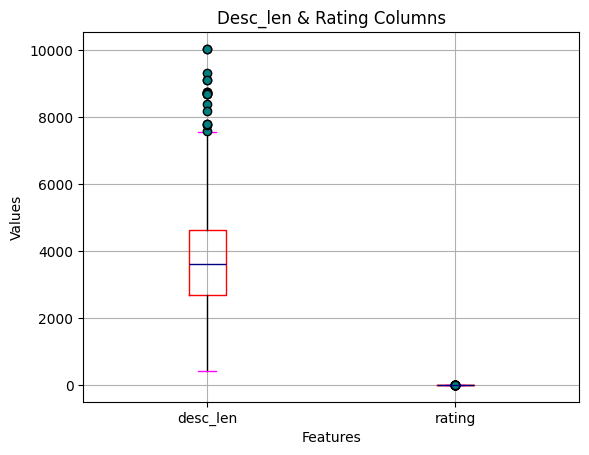

In [56]:
ax = df.boxplot(column=['desc_len', 'rating'], boxprops=dict(color='red'),
                medianprops=dict(color='navy'), whiskerprops=dict(color='black'),
                capprops=dict(color='magenta'), flierprops=dict(markerfacecolor='teal'))

# Set custom colors for the axes
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Desc_len & Rating Columns')

# Show the plot
plt.show()

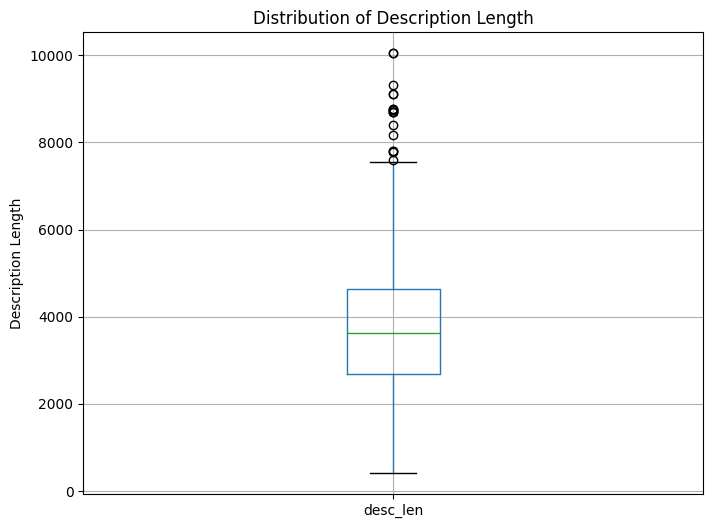

In [57]:
# Boxplot for desc_len
plt.figure(figsize=(8, 6))
df.boxplot(column=['desc_len'])
plt.title('Distribution of Description Length')
plt.ylabel('Description Length')
plt.show()

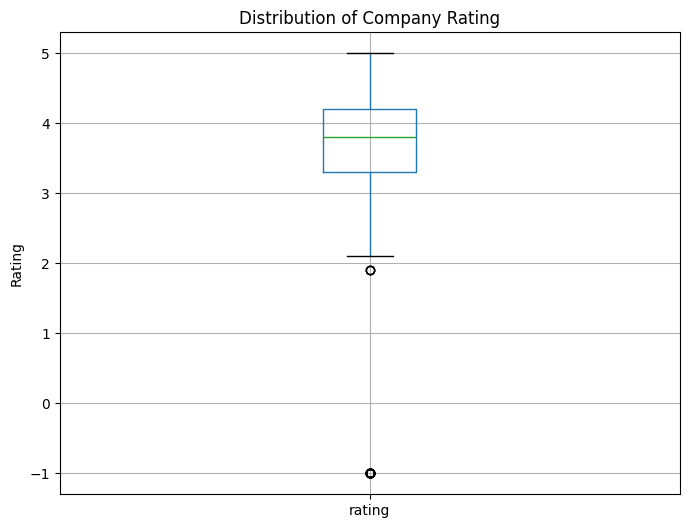

In [58]:
# Boxplot for rating
plt.figure(figsize=(8, 6))
df.boxplot(column=['rating'])
plt.title('Distribution of Company Rating')
plt.ylabel('Rating')
plt.show()

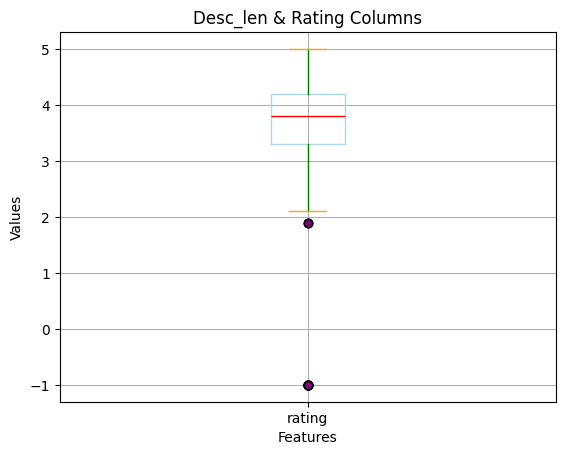

In [59]:
ax = df.boxplot(column=['rating'], boxprops=dict(color='lightblue'),
                medianprops=dict(color='red'), whiskerprops=dict(color='green'),
                capprops=dict(color='orange'), flierprops=dict(markerfacecolor='purple'))

# Set custom colors for the axes
ax.set_xlabel('Features')
ax.set_ylabel('Values')
ax.set_title('Desc_len & Rating Columns')

# Show the plot
plt.show()

In [60]:
#Co-Relation between variables
df[['Age','salary_estimate', 'rating', 'desc_len']].corr()

,Age,salary_estimate,rating,desc_len
Age,1.000000,0.019410,0.050077,0.187097
salary_estimate,0.019410,1.000000,0.013492,0.078808
rating,0.050077,0.013492,1.000000,-0.018090
desc_len,0.187097,0.078808,-0.018090,1.000000


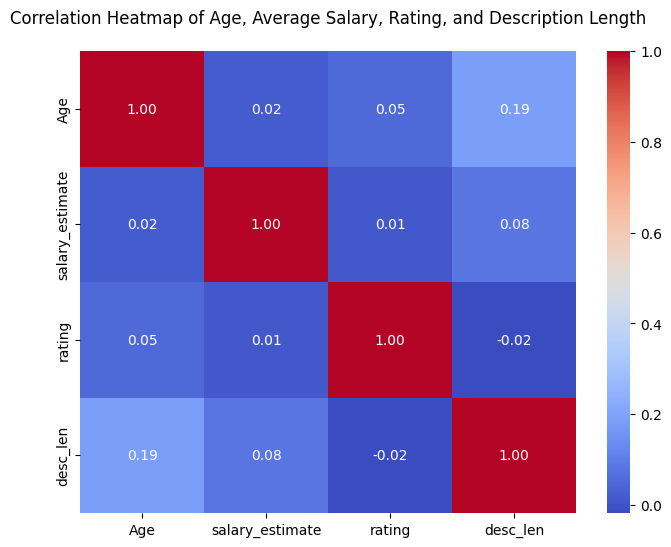

In [61]:
correlation_matrix = df[['Age','salary_estimate', 'rating', 'desc_len']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Age, Average Salary, Rating, and Description Length',pad=20)
plt.show()

In [62]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority', 'desc_len', 'Num_comp', 'min_salary_annual',
       'max_salary_annual'],
      dtype='object')

In [63]:
df_cat = df[['location', 'headquarters','size','type_of_ownership', 'industry', 'sector', 'revenue','company_name'
             ,'job_state', 'Same State','python_yn', 'r_yn', 'spark', 'aws',
       'excel', 'Job_simp', 'seniority']]
df_cat.head()

,location,headquarters,size,type_of_ownership,industry,sector,revenue,company_name,job_state,Same State,python_yn,r_yn,spark,aws,excel,Job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,1,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,1,0,0,1,data scientist,na


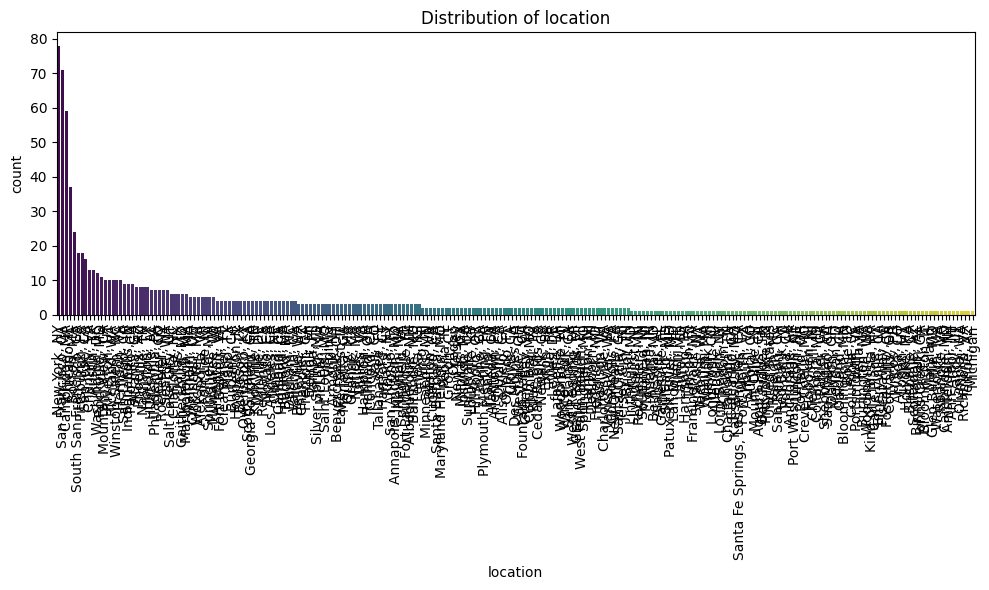

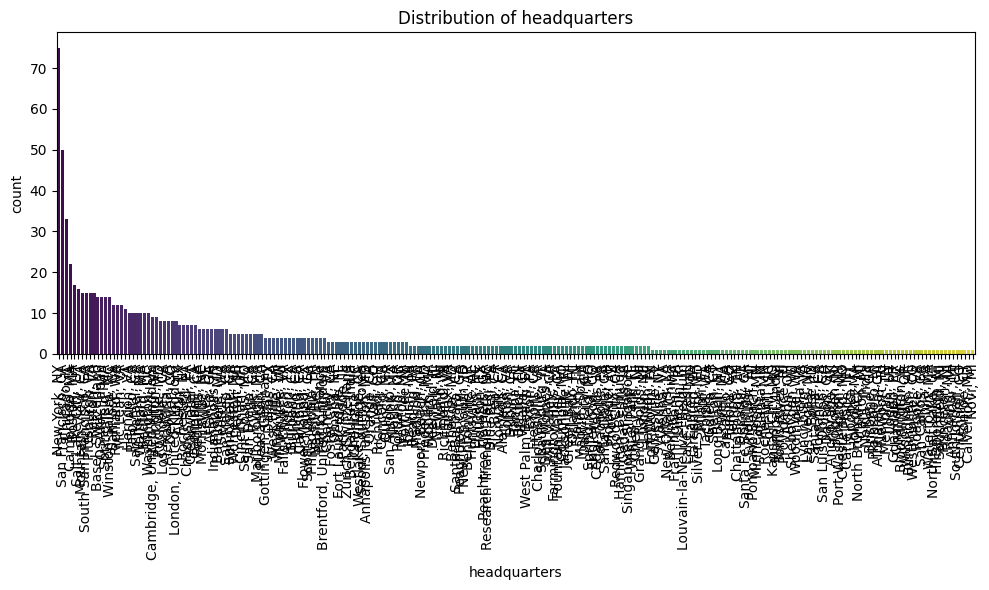

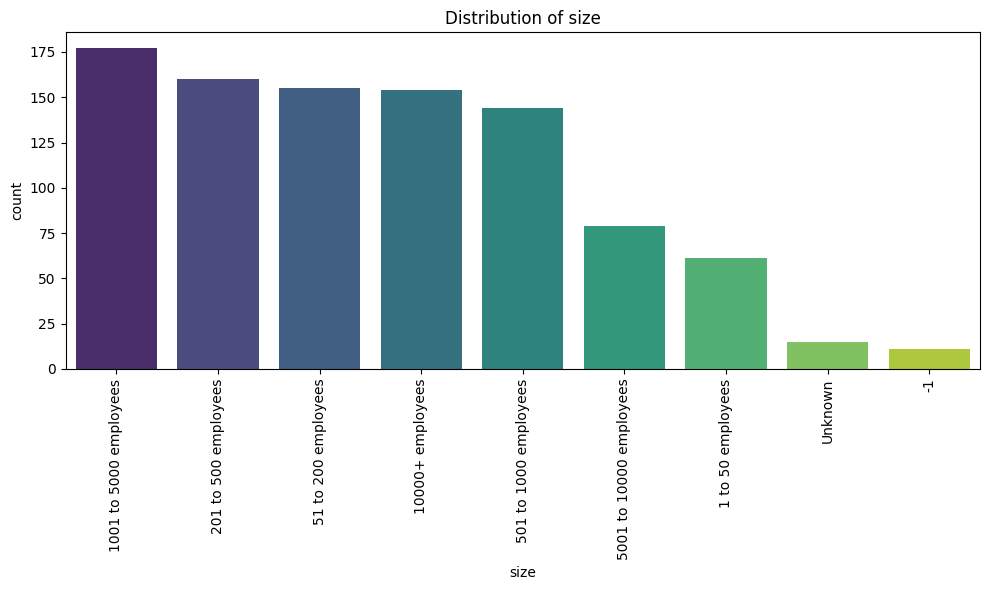

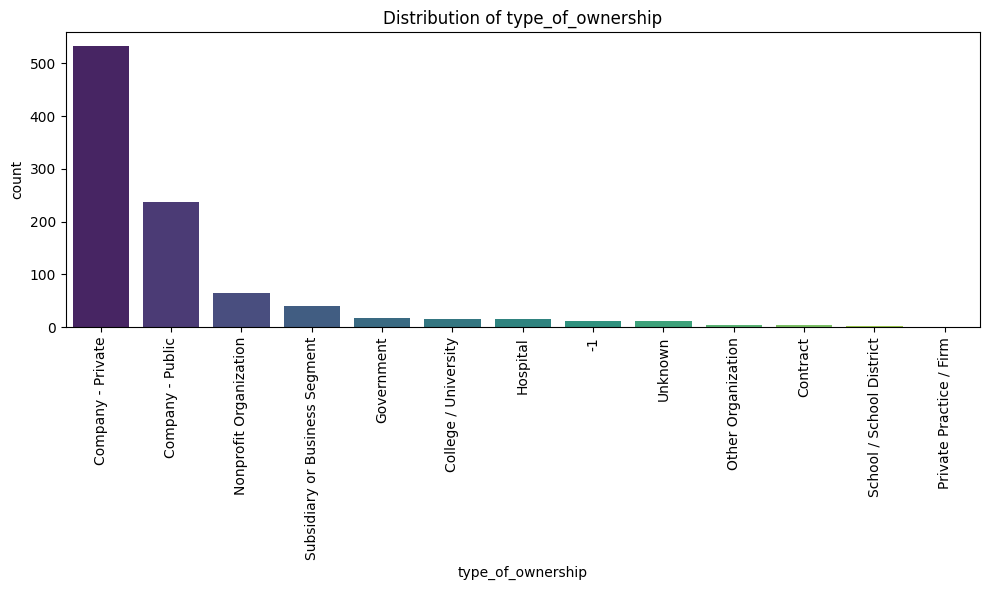

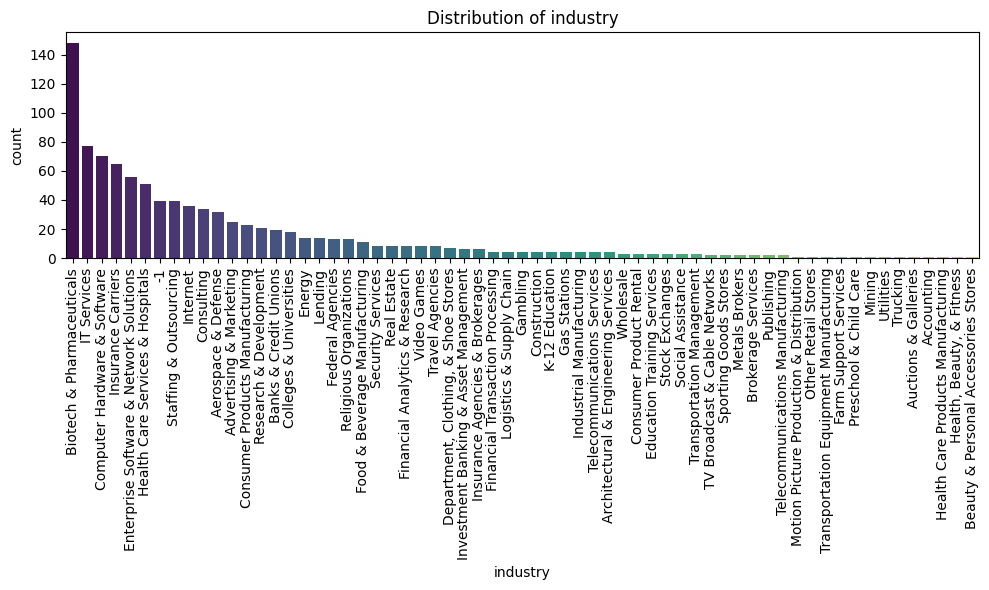

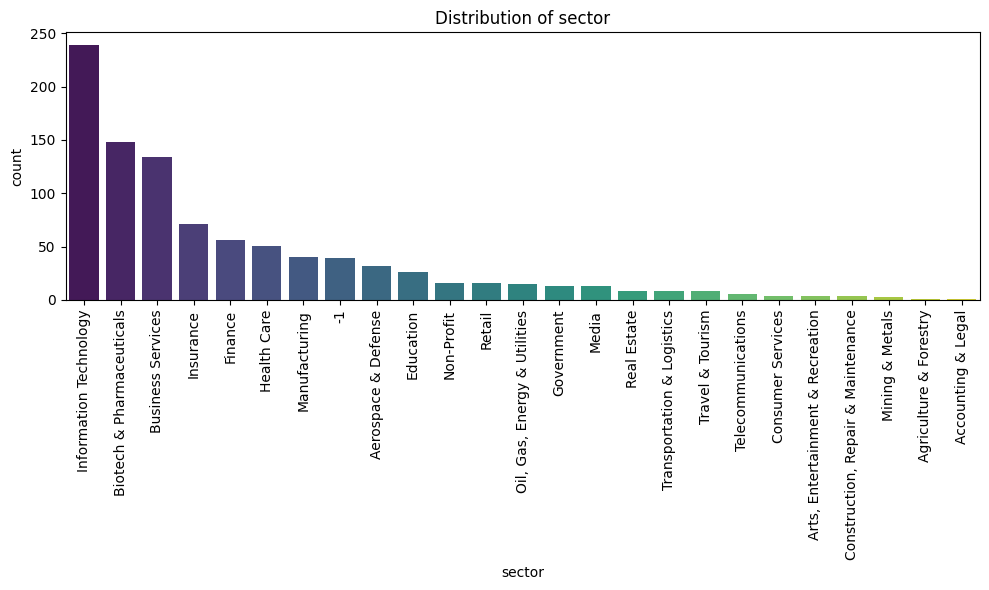

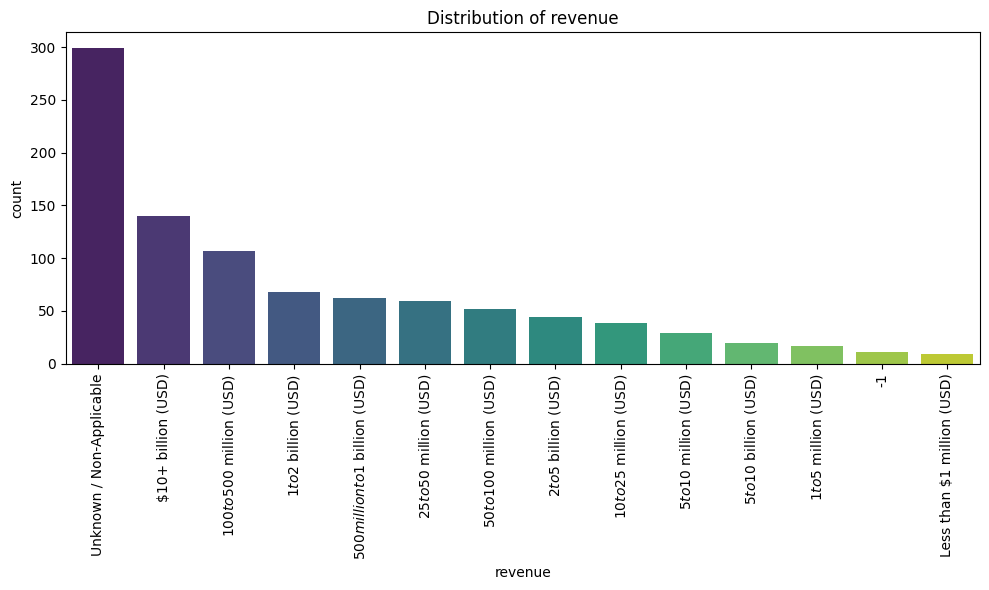

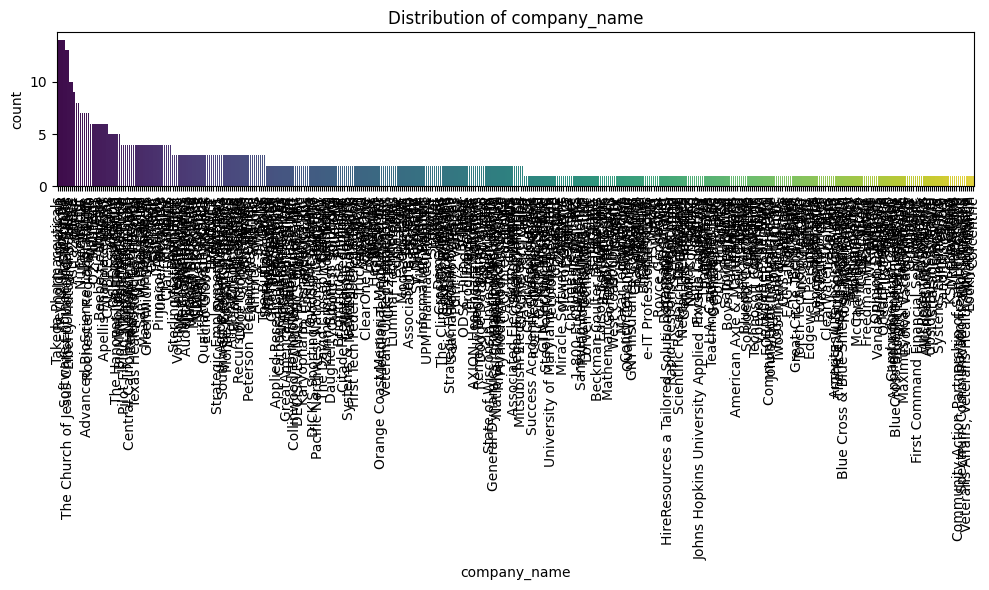

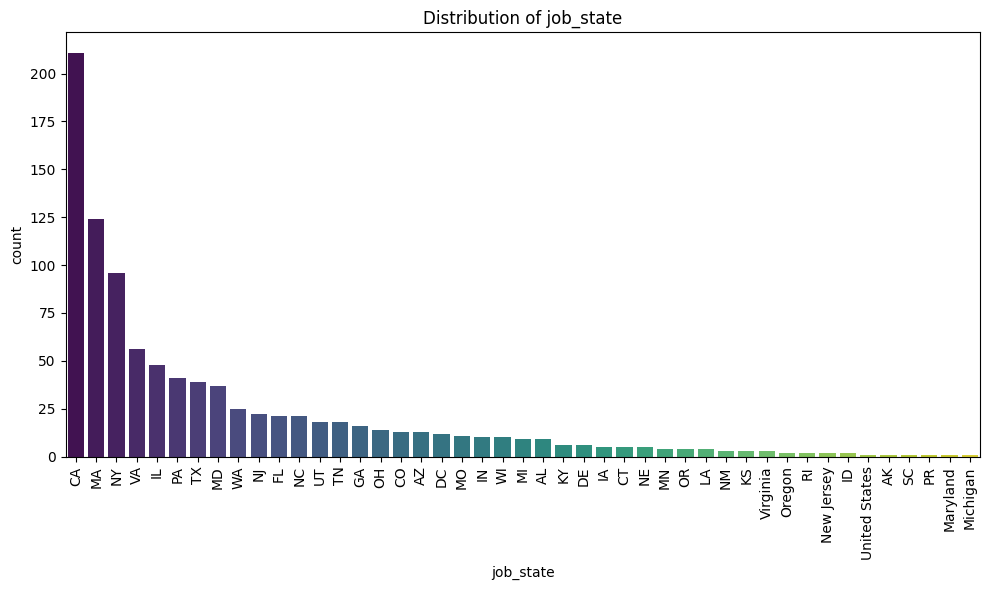

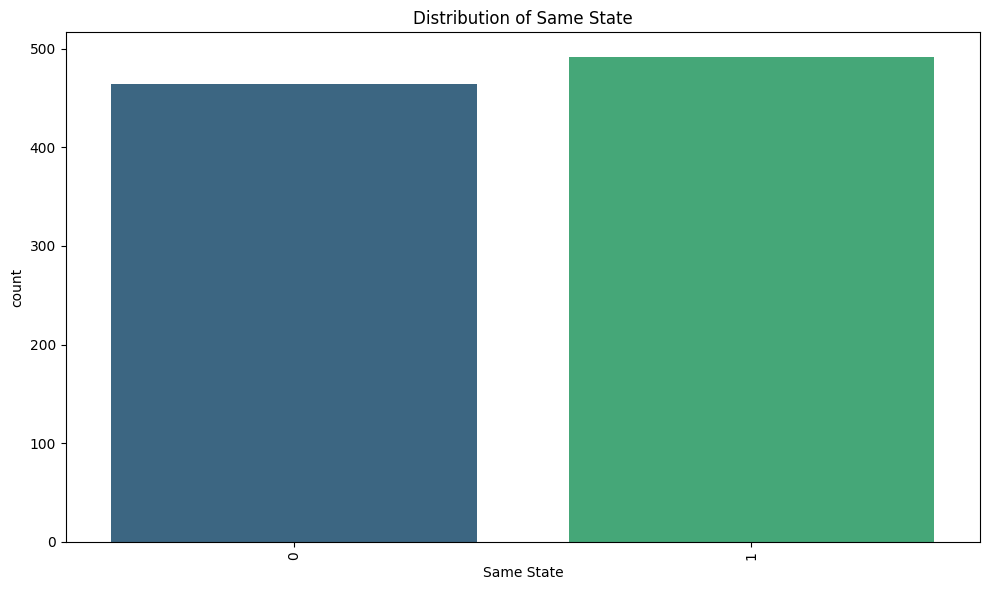

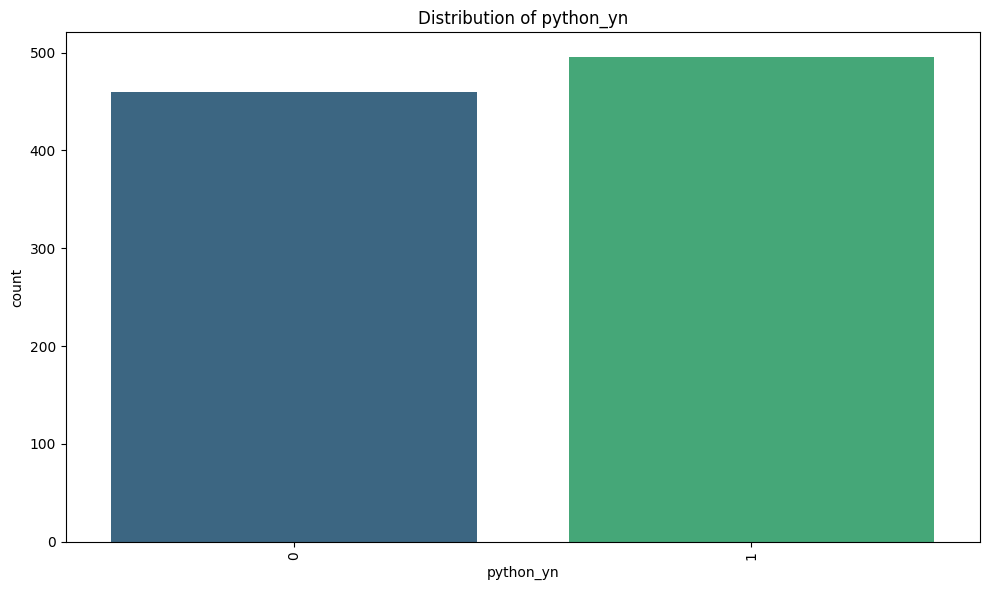

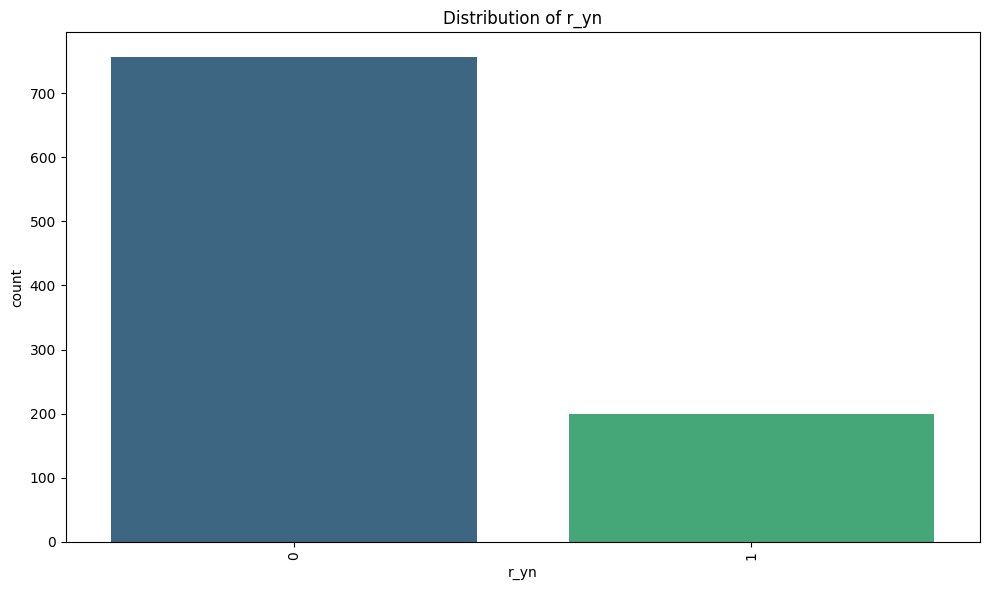

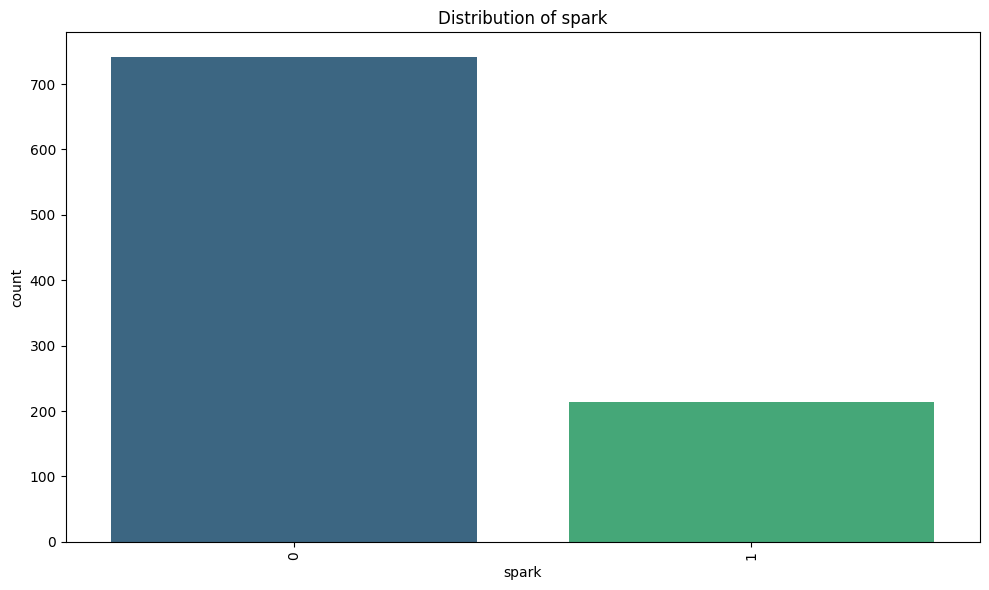

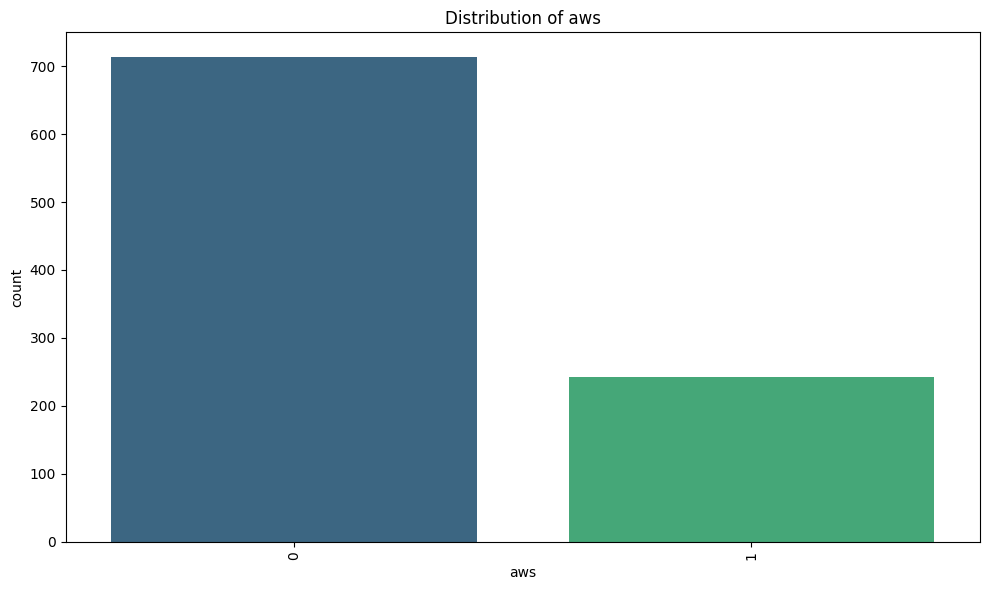

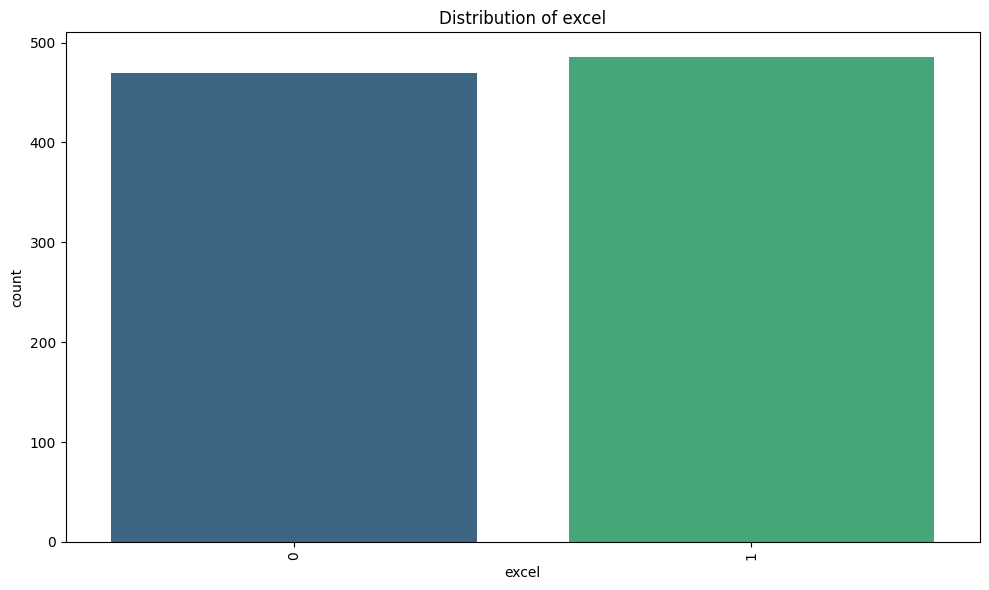

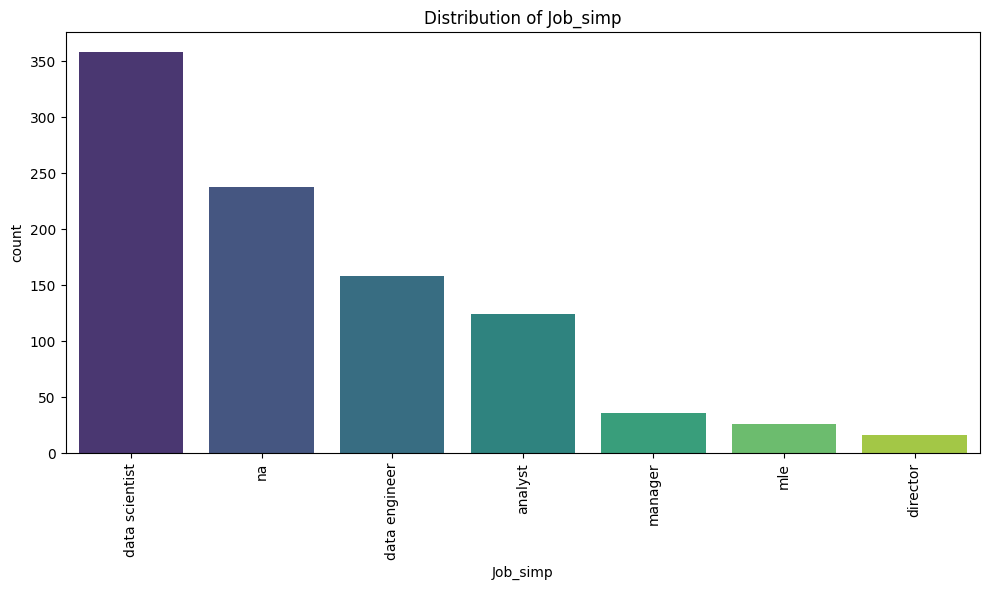

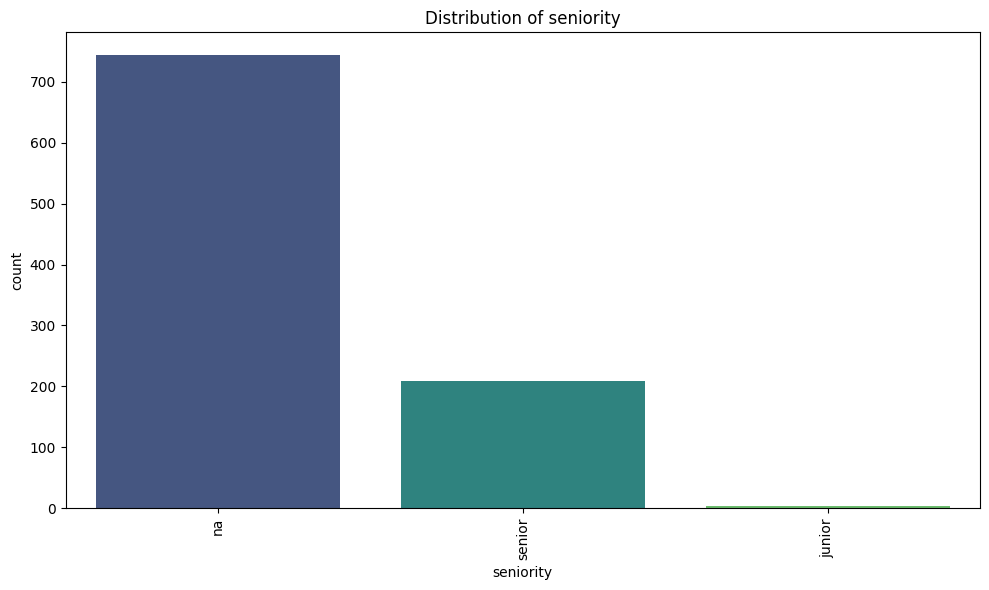

In [64]:
# Iterate over each categorical column and create a bar plot
for col in df_cat.columns:
    # Get the value counts for the current column
    cat_num = df_cat[col].value_counts()

    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))

    # Plot the bar chart
    sns.barplot(x=cat_num.index, y=cat_num, palette='viridis', hue=cat_num.index, legend=False)

    # Set title for the plot
    plt.title(f"Distribution of {col}")

    # Rotate x-axis labels for better readability if there are many categories
    plt.xticks(rotation=90)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

Graph for location: Total = 20
Graph for headquarters: Total = 20
Graph for company_name: Total = 20


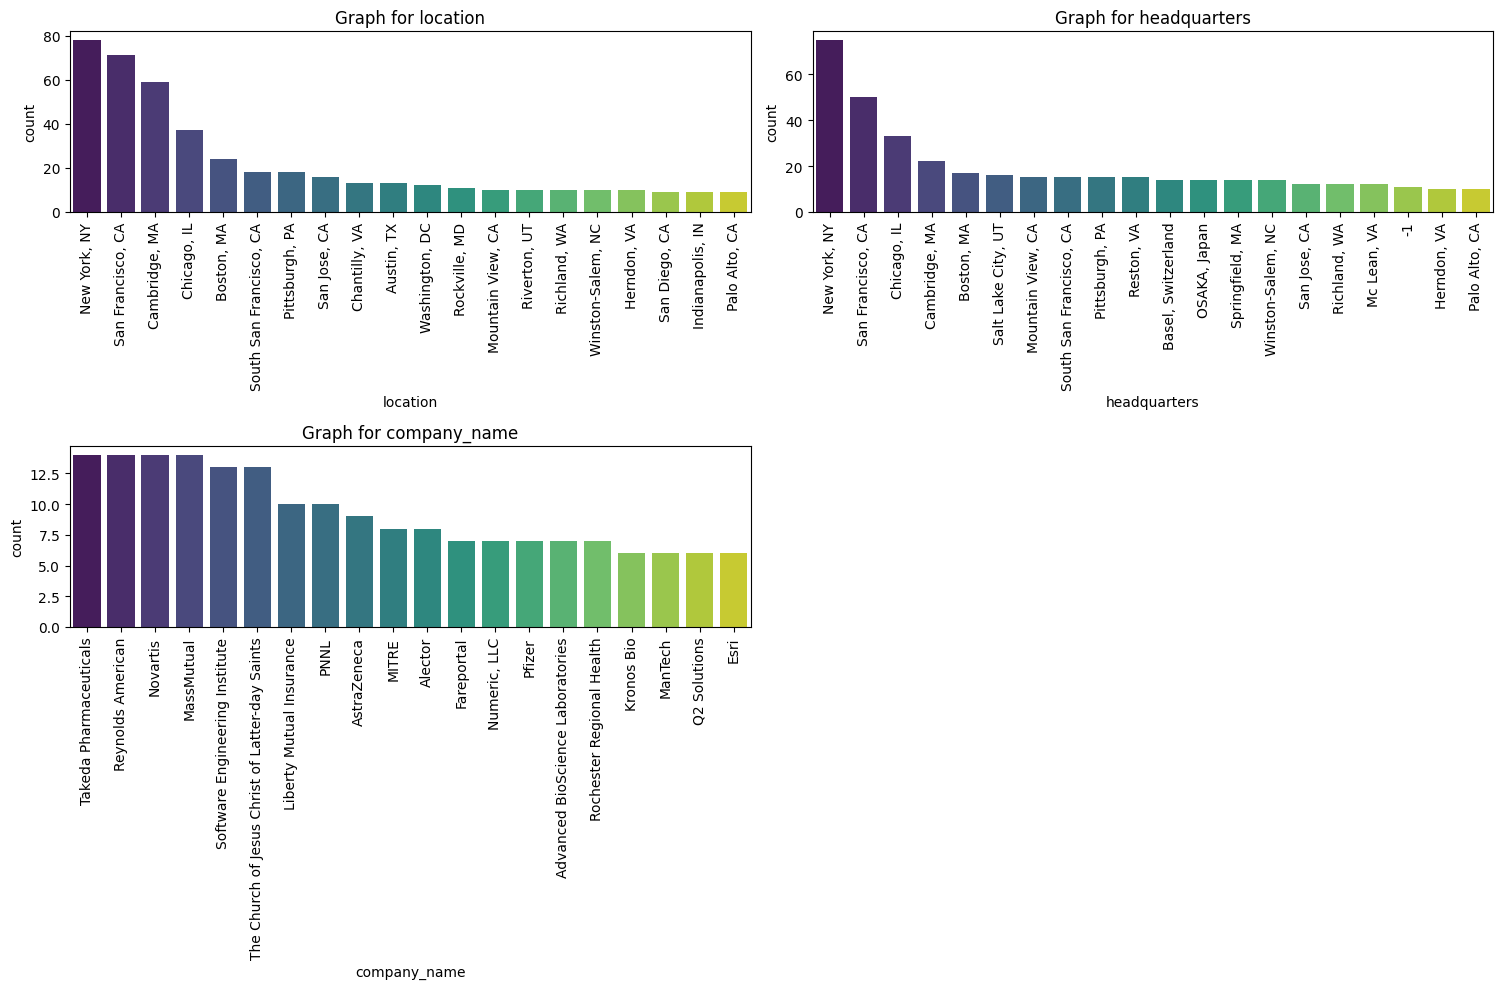

In [65]:
columns_of_interest = ['location', 'headquarters','company_name']

# Calculate the number of plots
num_plots = len(columns_of_interest)

# Calculate the number of rows and columns for subplots
num_cols_subplot = 2 # You can adjust this if needed
num_rows_subplot = (num_plots + num_cols_subplot - 1) // num_cols_subplot


# Create subplots
fig, axes = plt.subplots(num_rows_subplot, num_cols_subplot, figsize=(15, 5*num_rows_subplot))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over selected columns in df_cat
for i, col in enumerate(columns_of_interest):
    # Get value counts for the current column
    cat_num = df_cat[col].value_counts()[:20]
    print(f"Graph for {col}: Total = {len(cat_num)}")

    # Create a bar plot only if there are values to plot
    if not cat_num.empty:
        # Create a bar plot
        chart = sns.barplot(x=cat_num.index, y=cat_num, palette='viridis', ax=axes[i], hue=cat_num.index, legend=False)

        # Rotate x-axis labels for better readability
        chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

        # Set title for the subplot
        axes[i].set_title(f"Graph for {col}")


# Remove any unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [66]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority', 'desc_len', 'Num_comp', 'min_salary_annual',
       'max_salary_annual'],
      dtype='object')

In [67]:
pd.pivot_table(df, index='Job_simp', values= 'salary_estimate')

,salary_estimate
Job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [68]:
pd.pivot_table(df, index='industry', values='salary_estimate')

,salary_estimate
industry,
-1,114.650000
Accounting,113.500000
Advertising & Marketing,104.300000
Aerospace & Defense,99.060000
Architectural & Engineering Services,50.500000
Auctions & Galleries,128.000000
Banks & Credit Unions,70.625000
Beauty & Personal Accessories Stores,85.500000
Biotech & Pharmaceuticals,111.767857


In [69]:
pd.pivot_table(df, index='job_state', values='salary_estimate')

,salary_estimate
job_state,
AL,57.937500
AZ,85.666667
CA,123.513158
CO,77.045455
CT,71.100000
DC,110.181818
DE,27.500000
FL,77.625000
GA,80.666667


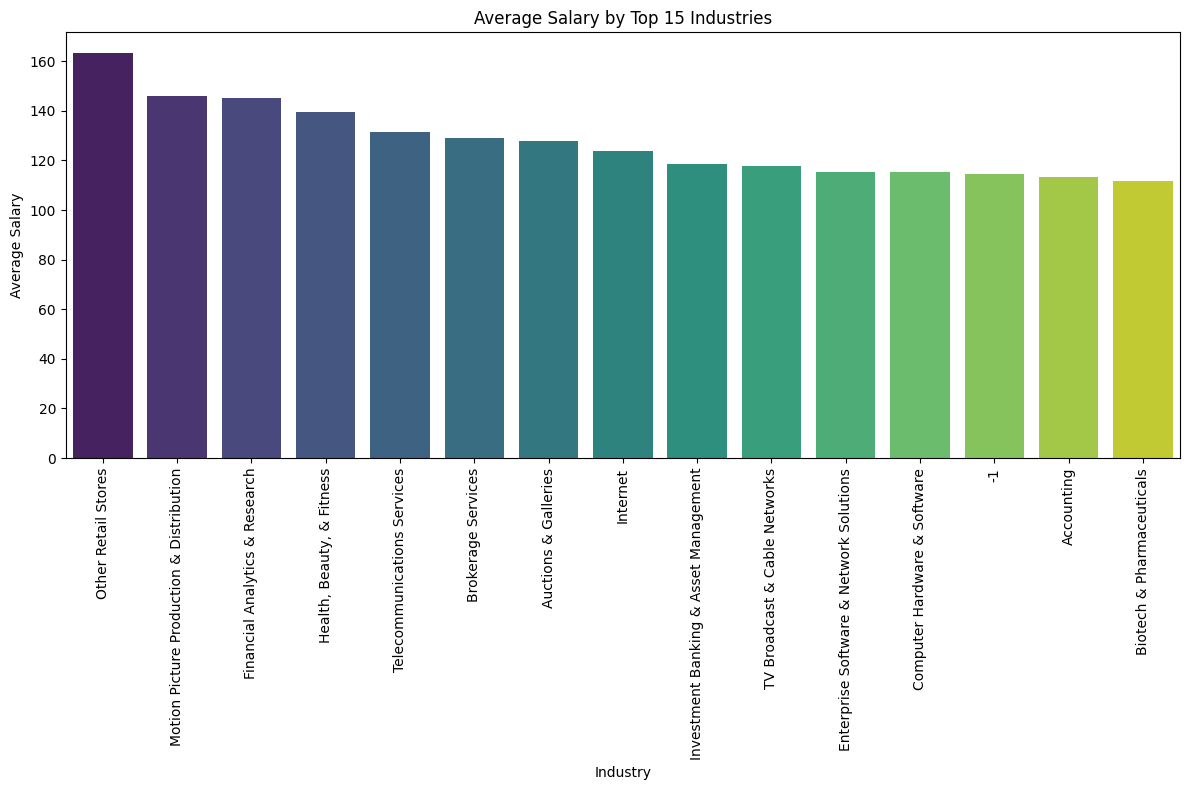

In [70]:
# Calculate average salary by industry and sort
avg_salary_by_industry = df.groupby('industry')['salary_estimate'].mean().sort_values(ascending=False)

# Select the top N industries (e.g., top 15 for better readability)
top_industries = avg_salary_by_industry.head(15)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_industries.index, y=top_industries.values, palette='viridis', hue=top_industries.index, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Average Salary')
plt.title('Average Salary by Top 15 Industries')
plt.tight_layout()
plt.show()

In [71]:
pd.pivot_table(df, index=['Job_simp','seniority'], values= 'salary_estimate')

salary_estimate
Job_simp       seniority                 
analyst        junior           53.250000
               na               61.440789
               senior           80.895833
data engineer  na              102.444444
               senior          114.586207
data scientist junior          106.500000
               na              112.844660
               senior          131.222222
director       na              168.607143
manager        na               84.022727
mle            na              126.218750
               senior          127.000000
na             na               77.352113
               senior          110.214286

In [72]:
pd.set_option('display.max_rows',None)

In [73]:
pd.pivot_table(df, index=['job_state','Job_simp'], values= 'salary_estimate', aggfunc='count').sort_values('job_state', ascending=False)

salary_estimate
job_state     Job_simp                       
WI            na                            4
              data scientist                3
              analyst                       3
WA            na                            1
              data scientist               17
              data engineer                 0
              analyst                       3
Virginia      data engineer                 0
VA            na                            5
              mle                           2
              data scientist               18
              data engineer                10
              analyst                       6
United States data scientist                0
UT            data engineer                 3
              analyst                       4
              data scientist                3
TX            na                            7
              data scientist               13
              data engineer                 8
              analyst                       0
TN            na                            0
              data scientist                1
              data engineer                10
              analyst                       2
SC            na                            1
RI            analyst                       1
PR            na                            0
PA            manager                       3
              analyst                       8
              data scientist                6
              data engineer                 1
              mle                           7
              na                            8
Oregon        data scientist                0
OR            data scientist                3
              data engineer                 1
OH            analyst                       4
              na                            3
              data scientist                7
New Jersey    data scientist                0
NY            na                           12
              mle                           2
              manager                       0
              data scientist               40
              data engineer                 4
              analyst                      14
NM            data scientist                3
NJ            data scientist                4
              analyst                       6
              data engineer                 2
              na                            1
              director                      2
              manager                       2
NE            na                            4
              analyst                       0
NC            na                           12
              data scientist                3
              data engineer                 6
Michigan      data scientist                0
Maryland      manager                       0
MO            na                            3
              manager                       1
              data scientist                3
              analyst                       2
MN            na                            0
              data engineer                 1
              analyst                       1
MI            manager                       2
              data scientist                4
              analyst                       0
MD            data scientist               13
              data engineer                 3
              analyst                       3
              na                           16
MA            na                           46
              mle                           0
              manager                       5
              director                      6
              data scientist               30
              data engineer                12
              analyst                       4
LA            data engineer                 2
              analyst                       1
              na                            1
KY            na            

In [74]:
pd.pivot_table(df[df.Job_simp=='data scientist'],index='job_state' ,values= 'salary_estimate').sort_values('salary_estimate', ascending=False)

,salary_estimate
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


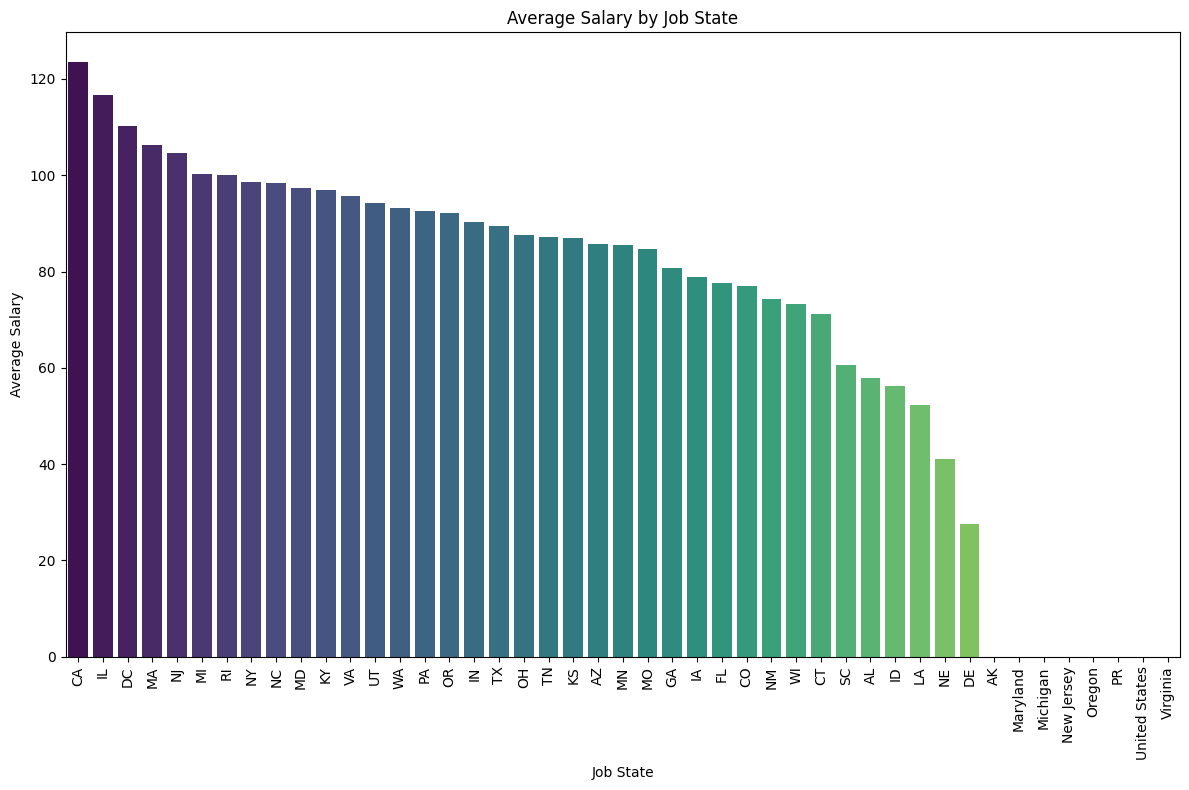

In [75]:
# Calculate average salary by job state and sort
avg_salary_by_state = df.groupby('job_state')['salary_estimate'].mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_state.index, y=avg_salary_by_state.values, palette='viridis', hue=avg_salary_by_state.index, legend=False)
plt.xticks(rotation=90)
plt.xlabel('Job State')
plt.ylabel('Average Salary')
plt.title('Average Salary by Job State')
plt.tight_layout()
plt.show()

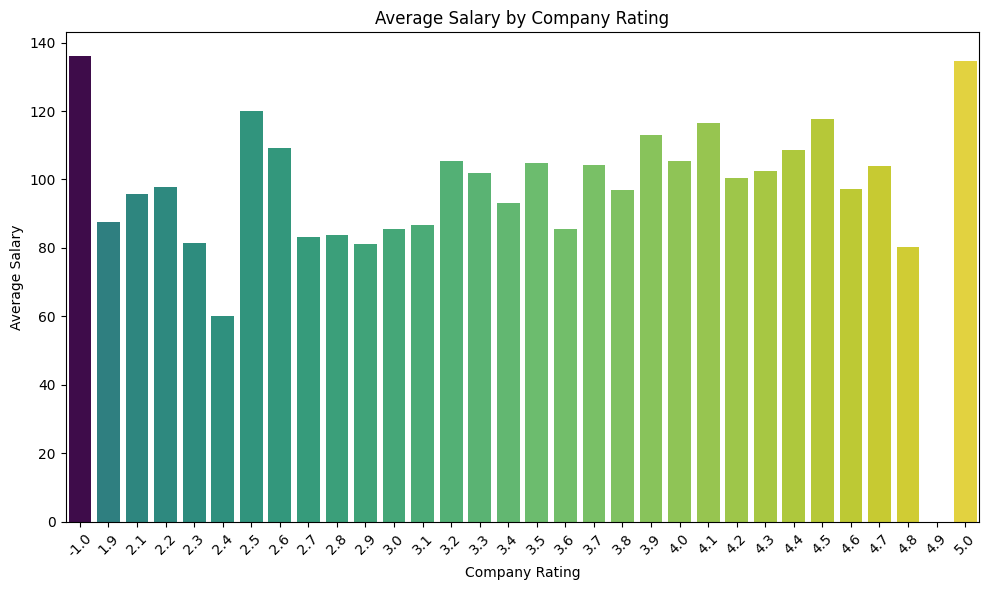

In [76]:
# Calculate average salary by rating
avg_salary_by_rating = df.groupby('rating')['salary_estimate'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_salary_by_rating.index, y=avg_salary_by_rating.values, palette='viridis', hue=avg_salary_by_rating.index, legend=False)
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.title('Average Salary by Company Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority', 'desc_len', 'Num_comp', 'min_salary_annual',
       'max_salary_annual'],
      dtype='object')

In [78]:
'''df_pivots = df[['rating', 'industry', 'sector', 'revenue',
                'employer_provided','Num_comp', 'hourly', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
                'desc_len','type_of_ownership','salary_estimate' ]]'''

"df_pivots = df[['rating', 'industry', 'sector', 'revenue',\n                'employer_provided','Num_comp', 'hourly', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',\n                'desc_len','type_of_ownership','salary_estimate' ]]"

In [79]:
'''df_pivots['salary_estimate'] = pd.to_numeric(df_pivots['salary_estimate'], errors='coerce')

# Drop rows with NaN values in 'Salary Estimate' column
df_pivots.dropna(subset=['salary_estimate'], inplace=True)

"""# Create pivot table for each column
for i in df_pivots.columns:
    if i != 'Salary Estimate':  # Exclude 'Salary Estimate' column from pivot table creation
        print(i)
        pivot_table = pd.pivot_table(df_pivots, index=i, values='salary_estimate', aggfunc='mean')
        pivot_table_sorted = pivot_table.sort_values('salary_estimate', ascending=False)
        print(pivot_table_sorted.head(2))'''

'df_pivots[\'salary_estimate\'] = pd.to_numeric(df_pivots[\'salary_estimate\'], errors=\'coerce\')\n\n# Drop rows with NaN values in \'Salary Estimate\' column\ndf_pivots.dropna(subset=[\'salary_estimate\'], inplace=True)\n\n"""# Create pivot table for each column\nfor i in df_pivots.columns:\n    if i != \'Salary Estimate\':  # Exclude \'Salary Estimate\' column from pivot table creation\n        print(i)\n        pivot_table = pd.pivot_table(df_pivots, index=i, values=\'salary_estimate\', aggfunc=\'mean\')\n        pivot_table_sorted = pivot_table.sort_values(\'salary_estimate\', ascending=False)\n        print(pivot_table_sorted.head(2))'

In [80]:
%pip install wordcloud nltk matplotlib

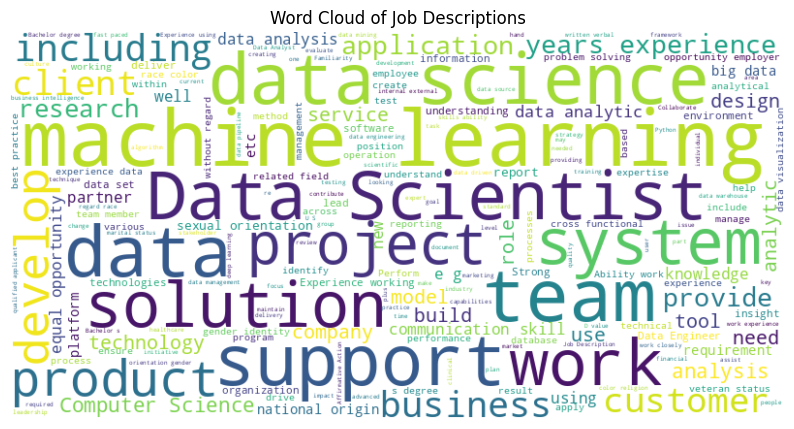

In [81]:
# Download stopwords if not already downloaded
nltk.download('stopwords', quiet=True)

# Combine all job descriptions into a single string
all_descriptions = ' '.join(df['job_description'].dropna().tolist())

# Remove stop words
stop_words = set(stopwords.words('english'))
words = all_descriptions.split()
filtered_words = [word for word in words if word.lower() not in stop_words]
cleaned_description = ' '.join(filtered_words)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_description)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Descriptions')
plt.show()

**5.Model Building**

---



In [82]:
df.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'headquarters', 'size', 'founded',
       'type_of_ownership', 'industry', 'sector', 'revenue', 'competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'job_state',
       'Same State', 'Age', 'python_yn', 'r_yn', 'spark', 'aws', 'excel',
       'Job_simp', 'seniority', 'desc_len', 'Num_comp', 'min_salary_annual',
       'max_salary_annual'],
      dtype='object')

In [83]:
df_model = df[['salary_estimate', 'rating', 'size', 'type_of_ownership', 'industry',
               'sector', 'revenue', 'Num_comp', 'hourly', 'job_title', 'job_state',
               'Same State', 'Age', 'python_yn', 'spark', 'aws', 'excel',
               'Job_simp', 'seniority', 'desc_len']].copy()
df_model.head()

,salary_estimate,rating,size,type_of_ownership,industry,sector,revenue,Num_comp,hourly,job_title,job_state,Same State,Age,python_yn,spark,aws,excel,Job_simp,seniority,desc_len
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,Data Scientist,NM,0,50,1,0,0,1,data scientist,na,2536
1,87.5,3.4,10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,Healthcare Data Scientist,MD,0,39,1,0,0,0,data scientist,na,4783
2,85.0,4.8,501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,0,Data Scientist,FL,1,13,1,1,0,1,data scientist,na,3461
3,76.5,3.8,1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,Data Scientist,WA,1,58,1,0,0,0,data scientist,na,3883
4,114.5,2.9,51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,Data Scientist,NY,1,25,1,0,0,1,data scientist,na,2728


In [84]:
df_model['salary_estimate'].isna().sum()

np.int64(214)

In [85]:
df_model = df_model.dropna(subset=['salary_estimate'])

In [86]:
df_model['salary_estimate'].isna().sum()

np.int64(0)

In [87]:
df_model.dtypes

,0
salary_estimate,float64
rating,float64
size,object
type_of_ownership,object
industry,object
sector,object
revenue,object
Num_comp,int64
hourly,int64
job_title,object


In [89]:
df_model = df_model.dropna(subset=['salary_estimate'])

In [90]:
X = df_model.drop('salary_estimate', axis=1)
y = df_model['salary_estimate']

In [91]:
cat_cols = ['size', 'type_of_ownership', 'industry', 'sector', 'revenue',
            'job_title', 'job_state', 'Job_simp', 'seniority']
num_cols = ['rating', 'Num_comp', 'hourly', 'Same State', 'Age',
            'python_yn', 'spark', 'aws', 'excel', 'desc_len']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (593, 19)
y_train shape: (593,)


In [93]:
X_train.select_dtypes(include=['object']).columns

Index(['size', 'type_of_ownership', 'industry', 'sector', 'revenue',
       'job_title', 'job_state', 'Job_simp', 'seniority'],
      dtype='object')

In [94]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

# 5. Fit and transform (avoiding data leakage)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training data shape: {X_train_processed.shape}")
print(f"Testing data shape: {X_test_processed.shape}")


Training data shape: (593, 410)
Testing data shape: (149, 410)


In [95]:
#Function:
def print_regression_metrics(y_test, y_pred,prefix=""):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{prefix} : \n R2: {r2:.4f} ,\n MAE: {mae:.4f} \n MSE: {mse:.4f} \n RMSE: {rmse:.4f}")
    return {
        'mae': mae,
        'mse': mse,
        'rmse': rmse,
        'r2': r2
    }

In [98]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror'),
}

In [99]:
results = {}
for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    metrics = print_regression_metrics(y_test, y_pred, prefix=name)
    results[name] = metrics



Training: LinearRegression
LinearRegression : 
 R2: 0.6853 ,
 MAE: 11.8813 
 MSE: 514.4287 
 RMSE: 22.6810

Training: Ridge
Ridge : 
 R2: 0.7369 ,
 MAE: 14.2887 
 MSE: 430.0121 
 RMSE: 20.7367

Training: Lasso
Lasso : 
 R2: 0.3507 ,
 MAE: 24.8634 
 MSE: 1061.3436 
 RMSE: 32.5783

Training: RandomForest
RandomForest : 
 R2: 0.7828 ,
 MAE: 11.7338 
 MSE: 355.0499 
 RMSE: 18.8428

Training: GradientBoosting
GradientBoosting : 
 R2: 0.6441 ,
 MAE: 18.0800 
 MSE: 581.7596 
 RMSE: 24.1197

Training: XGBoost
XGBoost : 
 R2: 0.7786 ,
 MAE: 10.5909 
 MSE: 361.9172 
 RMSE: 19.0241


In [102]:
results_df = pd.DataFrame(results).T.sort_values("r2", ascending=False)
print("MODEL COMPARISON : ")
print(results_df)

MODEL COMPARISON : 
                        mae          mse       rmse        r2
RandomForest      11.733758   355.049884  18.842767  0.782779
XGBoost           10.590919   361.917219  19.024122  0.778578
Ridge             14.288740   430.012105  20.736733  0.736917
LinearRegression  11.881337   514.428708  22.681021  0.685271
GradientBoosting  18.080040   581.759599  24.119693  0.644077
Lasso             24.863435  1061.343567  32.578268  0.350666


In [103]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0]
}

In [104]:
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    xgb, param_grid, cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1
)
grid_search.fit(X_train_processed, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
best_xgb = grid_search.best_estimator_


Fitting 3 folds for each of 54 candidates, totalling 162 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}


In [105]:
y_pred_best = best_xgb.predict(X_test_processed)
print_regression_metrics(y_test, y_pred_best, "Best XGBoost Model")

# 11. Save the complete pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_xgb)
])

Best XGBoost Model : 
 R2: 0.7863 ,
 MAE: 8.7780 
 MSE: 349.2514 
 RMSE: 18.6883


In [108]:
final_pipeline.fit(X, y)

# Save model and feature names
joblib.dump(final_pipeline, 'salary_prediction_pipeline.pkl')
joblib.dump(X.columns.tolist(), 'feature_columns.pkl')

print("\n✅ Model saved successfully!")
print("   - salary_prediction_pipeline.pkl")
print("   - feature_columns.pkl")



✅ Model saved successfully!
   - salary_prediction_pipeline.pkl
   - feature_columns.pkl


In [1]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np

# Load the saved pipeline and feature columns
try:
    pipeline = joblib.load('salary_prediction_pipeline.pkl')
    feature_columns = joblib.load('feature_columns.pkl')
    print("✅ Model loaded successfully!")
    print(f"Features: {feature_columns}")
except FileNotFoundError as e:
    print(f"❌ Model files not found: {e}")
    print("Please train the model first and ensure the .pkl files are in the same directory.")
    exit()

# Get unique values from dataset for dropdowns
try:
    # Assuming df is available from your training script
    job_titles = sorted(df['job_title'].value_counts().head(50).index.tolist())
    states = sorted(df['job_state'].unique().tolist())
    industries = sorted(df['industry'].value_counts().head(30).index.tolist())
    sectors = sorted(df['sector'].unique().tolist())
    sizes = sorted(df['size'].unique().tolist())
    ownership_types = sorted(df['type_of_ownership'].unique().tolist())
    revenues = sorted(df['revenue'].unique().tolist())
except NameError:
    # Default values if df is not available
    print("⚠️ DataFrame 'df' not found. Using default values for dropdowns.")
    job_titles = ['Data Scientist', 'Data Engineer', 'Software Engineer', 'Analyst',
                  'Machine Learning Engineer', 'Business Analyst', 'Senior Data Scientist']
    states = ['CA', 'NY', 'TX', 'WA', 'IL', 'MA', 'FL', 'PA']
    industries = ['Information Technology', 'Finance', 'Healthcare', 'Retail',
                  'Biotech & Pharmaceuticals', 'Insurance', 'Consulting']
    sectors = ['Information Technology', 'Business Services', 'Finance',
               'Healthcare', 'Education', 'Retail', 'Manufacturing']
    sizes = ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees',
             '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees',
             '10000+ employees', 'Unknown']
    ownership_types = ['Company - Private', 'Company - Public', 'Nonprofit Organization',
                       'Subsidiary or Business Segment', 'Unknown']
    revenues = ['Unknown / Non-Applicable', '$1 to $5 million (USD)',
                '$5 to $10 million (USD)', '$10 to $25 million (USD)',
                '$25 to $50 million (USD)', '$50 to $100 million (USD)',
                '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
                '$1 to $5 billion (USD)', '$5 to $10 billion (USD)', '$10+ billion (USD)']

# Job category and seniority options
job_categories = ['data scientist', 'data engineer', 'analyst', 'mle', 'manager', 'director', 'na']
seniority_levels = ['senior', 'junior', 'na']

def predict_salary(
    job_title, job_state, rating, company_age,
    size, ownership, industry, sector, revenue,
    python_yn, spark, aws, excel,
    job_simp, seniority,
    same_state, hourly, num_comp, desc_len
):
    try:
        # Create input dataframe matching exact training structure
        input_data = pd.DataFrame({
            'rating': [float(rating)],
            'size': [size],
            'type_of_ownership': [ownership],
            'industry': [industry],
            'sector': [sector],
            'revenue': [revenue],
            'Num_comp': [int(num_comp)],
            'hourly': [1 if hourly else 0],
            'job_title': [job_title],
            'job_state': [job_state],
            'Same State': [1 if same_state else 0],
            'Age': [int(company_age)],
            'python_yn': [1 if python_yn else 0],
            'spark': [1 if spark else 0],
            'aws': [1 if aws else 0],
            'excel': [1 if excel else 0],
            'Job_simp': [job_simp],
            'seniority': [seniority],
            'desc_len': [int(desc_len)]
        })

        # Ensure columns are in the same order as training
        input_data = input_data[feature_columns]

        # Make prediction
        prediction = pipeline.predict(input_data)[0]

        # Format output with better styling
        salary_type = "Hourly" if hourly else "Annual"
        output_text = f"""
        ═══════════════════════════════════════
        💰 SALARY PREDICTION RESULT
        ═══════════════════════════════════════

        Position: {job_title}
        Location: {job_state}
        Seniority: {seniority.capitalize()}

        Estimated {salary_type} Salary: ${prediction:,.2f}K

        ═══════════════════════════════════════
        """
        return output_text.strip()

    except Exception as e:
        error_msg = f"""
        ❌ PREDICTION ERROR
        ═══════════════════════════════════════

        Error: {str(e)}

        Please check your inputs and try again.
        Make sure all required fields are filled.

        ═══════════════════════════════════════
        """
        return error_msg.strip()

# Create Gradio interface with organized sections
with gr.Blocks(theme=gr.themes.Soft(), title="Job Salary Predictor") as interface:
    gr.Markdown("""
    # 💼 Job Salary Predictor
    ### Predict salary based on job details, company information, and required skills

    Fill in the details below to get an estimated salary prediction powered by machine learning.
    """)

    with gr.Row():
        with gr.Column():
            gr.Markdown("### 📋 Job Details")
            job_title_input = gr.Dropdown(
                job_titles,
                label="Job Title",
                value=job_titles[0],
                info="Select the job title from the dropdown"
            )
            job_state_input = gr.Dropdown(
                states,
                label="Job State/Location",
                value=states[0],
                info="Location of the job"
            )
            job_simp_input = gr.Dropdown(
                job_categories,
                label="Job Category",
                value="data scientist",
                info="Simplified job category"
            )
            seniority_input = gr.Dropdown(
                seniority_levels,
                label="Seniority Level",
                value="na",
                info="Junior, Senior, or N/A"
            )
            desc_len_input = gr.Slider(
                50, 2000,
                value=500,
                step=10,
                label="Job Description Length (characters)",
                info="Approximate length of job posting"
            )

        with gr.Column():
            gr.Markdown("### 🏢 Company Information")
            rating_input = gr.Slider(
                1, 5,
                value=3.5,
                step=0.1,
                label="Company Rating",
                info="Glassdoor rating (1-5)"
            )
            company_age_input = gr.Slider(
                0, 150,
                value=20,
                step=1,
                label="Company Age (years)",
                info="How old is the company?"
            )
            size_input = gr.Dropdown(
                sizes,
                label="Company Size",
                value=sizes[0],
                info="Number of employees"
            )
            ownership_input = gr.Dropdown(
                ownership_types,
                label="Type of Ownership",
                value=ownership_types[0],
                info="Company ownership structure"
            )
            revenue_input = gr.Dropdown(
                revenues,
                label="Company Revenue",
                value=revenues[0],
                info="Annual revenue range"
            )

    with gr.Row():
        with gr.Column():
            gr.Markdown("### 🔧 Required Skills")
            python_input = gr.Checkbox(
                label="Python Required",
                value=False,
                info="Is Python mentioned in job description?"
            )
            spark_input = gr.Checkbox(
                label="Spark Required",
                value=False,
                info="Is Apache Spark required?"
            )
            aws_input = gr.Checkbox(
                label="AWS Required",
                value=False,
                info="Is AWS experience needed?"
            )
            excel_input = gr.Checkbox(
                label="Excel Required",
                value=False,
                info="Is Excel proficiency required?"
            )

        with gr.Column():
            gr.Markdown("### 📊 Additional Details")
            industry_input = gr.Dropdown(
                industries,
                label="Industry",
                value=industries[0],
                info="Company industry"
            )
            sector_input = gr.Dropdown(
                sectors,
                label="Sector",
                value=sectors[0],
                info="Business sector"
            )
            same_state_input = gr.Checkbox(
                label="Job in Same State as HQ",
                value=True,
                info="Is job location same as headquarters?"
            )
            hourly_input = gr.Checkbox(
                label="Hourly Position",
                value=False,
                info="Is this an hourly wage position?"
            )
            num_comp_input = gr.Slider(
                0, 20,
                value=0,
                step=1,
                label="Number of Competitors Listed",
                info="How many competitors are mentioned?"
            )

    predict_button = gr.Button("🔮 Predict Salary", variant="primary", size="lg")
    output = gr.Textbox(
        label="Prediction Result",
        lines=10,
        show_copy_button=True
    )

    # Connect inputs to prediction function
    predict_button.click(
        fn=predict_salary,
        inputs=[
            job_title_input, job_state_input, rating_input, company_age_input,
            size_input, ownership_input, industry_input, sector_input, revenue_input,
            python_input, spark_input, aws_input, excel_input,
            job_simp_input, seniority_input,
            same_state_input, hourly_input, num_comp_input, desc_len_input
        ],
        outputs=output
    )

    gr.Markdown("---")
    gr.Markdown("""
    ### 💡 Tips for Best Results:
    - Fill in all fields as accurately as possible
    - Use realistic combinations (e.g., Senior Data Scientist should have appropriate skills)
    - Adjust the parameters to see how different factors affect salary predictions
    - The model was trained on Glassdoor job data

    ### 📝 Note:
    Predictions are estimates based on historical data and may not reflect current market conditions.
    """)

if __name__ == "__main__":
    interface.launch(
        share=False,
        server_name="0.0.0.0",
        server_port=7860,
        show_error=True
    )

✅ Model loaded successfully!
Features: ['rating', 'size', 'type_of_ownership', 'industry', 'sector', 'revenue', 'Num_comp', 'hourly', 'job_title', 'job_state', 'Same State', 'Age', 'python_yn', 'spark', 'aws', 'excel', 'Job_simp', 'seniority', 'desc_len']
⚠️ DataFrame 'df' not found. Using default values for dropdowns.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.
* To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>